# Techie Data Science Project: Conversational ChatBot - Part 1

在ChatBot项目中，我们将利用对话文本信息训练多种Neural Network模型，最后开发出一个conversional chatbot 产品。在Notebook Part 1中， 我们先利用Feedforward Neural Network构造一个简单的主题分类模型。随后在Part 2中，我们会利用Recurrent Neural Network seq2seq model来构造General conversional chatbot.

# 1. Load Data to Colab

In [ ]:
from collections import defaultdict
from keras.models import Sequential, load_model
from keras.preprocessing import text
from keras.layers import Dense, Activation, Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
import numpy as np
import pickle
import random
import os
import yaml
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/chatbot

/content/drive/MyDrive/chatbot


In [ ]:
files = os.listdir('data/')

In [ ]:
categories = list()
questions = list()
answers_raw = list()

for file in files:
  docs = yaml.safe_load(open('data/' + file, 'r')) 
  conversations = docs['conversations']
  for cur_con in conversations:
    if len(cur_con) > 2:
      for ans in cur_con[1: ]:
        categories.append(docs['categories'][0])
        questions.append(cur_con[0])
        answers_raw.append(ans)
      #questions.append(cur_con[0])
      #answers_raw.append(' '.join(cur_con[1: ]))
    elif len(cur_con) == 2:
      if type( cur_con[1] ) == str: # Filter out unexpected input format
        categories.append(docs['categories'][0])
        questions.append(cur_con[0])
        answers_raw.append(cur_con[1])

In [ ]:
print(questions)
print(len(questions))
print(answers_raw)
print(len(answers_raw))
print(categories)
print(len(categories))

['tell me about the american civil war', 'do you know about the american civil war', 'What is history?', 'what kind of history', 'are you interested in history', 'explain history', 'who invented the lightbulb', 'who invented the steam engine', 'Hello', 'Hi', 'Greetings!', 'Hello', 'Hi, How is it going?', 'Hi, How is it going?', 'Hi, How is it going?', 'Hi, How is it going?', 'Hi, How is it going?', 'Hi, How is it going?', 'How are you doing?', 'How are you doing?', 'How are you doing?', 'Nice to meet you.', 'How do you do?', 'How do you do?', 'Hi, nice to meet you.', 'It is a pleasure to meet you.', 'Top of the morning to you!', 'Top of the morning to you!', "What's up?", "What's up?", "What's up?", "What's up?", "What's up?", 'you sound like hal', 'you sound like yoda', 'have you seen blade runner', 'xfind spiderman', 'when did teknolust', 'what is spiderman', 'what is teknolust', 'what is solaris', 'what is hal9000', 'what does hal stand for', 'i saw the matrix', 'is hal 9000 your bo

# 2. Data Preprocessing - Bag of Words (BoW) representation

2.1. Construct training features with questions content (BoW)

In [ ]:
tokenizer = text.Tokenizer() # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer.fit_on_texts(questions)

In [ ]:
tokenized_questions = tokenizer.texts_to_sequences(questions)

In [ ]:
tokenized_questions[0]

[9, 8, 30, 7, 147, 192, 148]

In [ ]:
def sentence_parsing(tokenizer, tokenized_sentence):
  bag = []
  for cur_word in tokenizer.word_index:
    bag.append(1) if tokenizer.word_index[cur_word] in tokenized_sentence else bag.append(0)
  return bag

In [ ]:
questions_bow = []
for question in tokenized_questions:
  questions_bow.append(sentence_parsing(tokenizer, question))
questions_bow = np.array(questions_bow)

In [ ]:
questions_bow.shape

(870, 549)

2.2. Construct training labels with categories

In [ ]:
categories_list = list(set(categories))
categories_dict = {k: v for v, k in enumerate(categories_list)}

In [ ]:
output_empty = [0] * len(categories_dict)
output_label = []
for ca in categories:
  if ca in categories_dict:
    output_row = list(output_empty)
    output_row[categories_dict[ca]] = 1
    output_label.append(output_row)
output_label = np.array(output_label)    

In [ ]:
output_label.shape

(870, 19)

# 3. Train Neural Network Model

We train a simple neural network model for question topic classification.

In [ ]:
model = Sequential()
model.add(Dense(units=128, input_shape=(len(questions_bow[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(output_label[0]), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               70400     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                1235      
Total params: 79,891
Trainable params: 79,891
Non-trainable params: 0
_________________________________________________________________


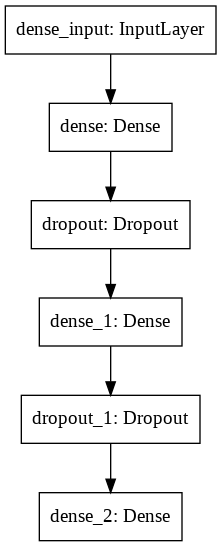

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(questions_bow, output_label, epochs=200, batch_size=5, verbose=1)

Epoch 1/200
174/174 [==============================] - 1s 2ms/step - loss: 2.8332
Epoch 2/200
174/174 [==============================] - 0s 2ms/step - loss: 2.1994
Epoch 3/200
174/174 [==============================] - 0s 2ms/step - loss: 1.7887
Epoch 4/200
174/174 [==============================] - 0s 2ms/step - loss: 1.4992
Epoch 5/200
174/174 [==============================] - 0s 2ms/step - loss: 1.2417
Epoch 6/200
174/174 [==============================] - 0s 2ms/step - loss: 1.0287
Epoch 7/200
174/174 [==============================] - 0s 2ms/step - loss: 0.8315
Epoch 8/200
174/174 [==============================] - 0s 2ms/step - loss: 0.7323
Epoch 9/200
174/174 [==============================] - 0s 2ms/step - loss: 0.6252
Epoch 10/200
174/174 [==============================] - 0s 2ms/step - loss: 0.4902
Epoch 11/200
174/174 [==============================] - 0s 2ms/step - loss: 0.3788
Epoch 12/200
174/174 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 13/200


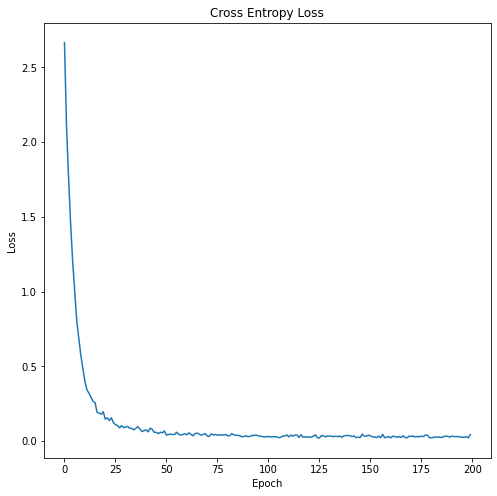

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#4. (Optional) Save Model and Related Params for Chatbot GUI Development

Chatbot GUI development will be discussed in notebook part 2.

In [ ]:
# Save model and related language params
model.save('classification_model.h5')

In [ ]:
save_params_classification = {}
save_params_classification['tokenizer'] = tokenizer
save_params_classification['categories_list'] = categories_list

In [ ]:
pickle.dump(save_params_classification, open('save_params_classification.pkl','wb'))

# 5. Model Inference

In [ ]:
answers_dict = defaultdict(list) # By using defaultdict, we don't need to check key exist
for idx in range(len(answers_raw)):
  cur_category = categories[idx]
  answers_dict[cur_category].append(answers_raw[idx])

In [ ]:
for _ in range(3):
  input_str = input( 'Please enter you question : ' )

  # parse input question
  tokenized_question = tokenizer.texts_to_sequences([input_str])
  parsed_question = sentence_parsing(tokenizer, tokenized_question[0])

  # predict question category
  model_output = model.predict(np.array([parsed_question]))
  category_result = categories_list[np.argmax(model_output)]
  print('(Question category: ', category_result, ')')
  
  # randomly pick one answer from predicted category
  #print('Techie Bot: ', random.choice(answers_dict[category_result]))

Please enter you question : how are you?
(Question category:  conversations )
Please enter you question : Are you angry?
(Question category:  emotion )
Please enter you question : Tell me a joke, please
(Question category:  humor )
